In [78]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
# from torchvision import datasets, transforms

print('blah')

blah


In [79]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [80]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_softmax_stack = nn.Sequential(
            nn.Linear(8, 13),
            nn.ReLU(),
            nn.Linear(13, 3),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_softmax_stack(x)
        return logits

In [81]:
#Load orcreate new model

model = NeuralNetwork().to(device)
model_path = 'my_model.pt'

if(os.path.exists(model_path)):
    model.load_state_dict(torch.load(model_path))
    print("Loaded saved state")

In [82]:
X = torch.rand(1, 8, device=device)
logits = model(X)
print(f"All returns: {logits}")

pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

All returns: tensor([[ 0.3499, -0.3212, -0.5514]], grad_fn=<AddmmBackward0>)
Predicted class: tensor([0])


In [83]:
# Prepare to load data in next sesction
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

class PongDataset(Dataset):
    def __init__(self, X, y):
        self.features = X.values
        self.labels = y.values

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        feature = self.features[idx]
        label = self.labels[idx]
        return feature, label

In [84]:

#load data from file
play_data = pd.read_table('TrainingQueue.tsv')
#print("Printing play_data: ", play_data)
X = play_data.drop(['MyPaddleIsRight', 'MyPaddleIsLeft', 'MyPaddleIsStill', 'Unnamed: 11'], axis=1).dropna()
# y = play_data[['MyPaddleIsRight', 'MyPaddleIsLeft', 'MyPaddleIsStill']].dropna()
y = play_data[['MyPaddleIsRight', 'MyPaddleIsLeft', 'MyPaddleIsStill']].dropna()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create data loaders for the training and validation sets
train_dataset = PongDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = PongDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [85]:
test_data = pd.read_table('TrainingQueue.tsv')
#print(test_data)
test_data_X = test_data.drop(['MyPaddleIsRight', 'MyPaddleIsLeft', 'MyPaddleIsStill', 'Unnamed: 11'], axis=1).dropna()
test_data_DropNa = test_data_X.dropna()
print(test_data_DropNa)

       MyPaddlePosition  MyPaddleTimeAsIs  OpponentPaddle  OpponentVelocity  \
0             -1.000000          1.693643        0.000000               0.0   
1             -0.840000          0.000000        0.000000               0.0   
2             -0.840000          0.000000        0.000000               0.0   
3             -0.840000          0.023200        0.000000               0.0   
4             -0.840000          0.050913        0.000000               0.0   
...                 ...               ...             ...               ...   
13438          0.005001          2.910889       -2.085001               0.0   
13439          0.005001          2.931305       -2.085001               0.0   
13440          0.005001          2.955170       -2.085001               0.0   
13441          0.005001          2.979248       -2.085001               0.0   
13442          0.005001          3.001923       -2.085001               0.0   

       BallPositionX  BallPositionY  BallVelocityX 

In [86]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create data loaders for the training and validation sets
train_dataset = PongDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = PongDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


c:\Users\User\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([32, 1, 3])) that is different to the input size (torch.Size([32, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\User\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([2, 1, 3])) that is different to the input size (torch.Size([2, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\User\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1, 1, 3])) that is different to the input size (torch.Size([1, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  retu

Epoch [0/10], Train Loss: 0.2598, Val Loss: 0.1971
Epoch [1/10], Train Loss: 0.0134, Val Loss: 0.1230
Epoch [2/10], Train Loss: 0.3525, Val Loss: 0.1054
Epoch [3/10], Train Loss: 0.0105, Val Loss: 0.1025
Epoch [4/10], Train Loss: 0.0193, Val Loss: 0.1016
Epoch [5/10], Train Loss: 0.0132, Val Loss: 0.1006
Epoch [6/10], Train Loss: 0.0166, Val Loss: 0.1000
Epoch [7/10], Train Loss: 0.0189, Val Loss: 0.0994
Epoch [8/10], Train Loss: 0.2660, Val Loss: 0.0992
Epoch [9/10], Train Loss: 0.2531, Val Loss: 0.0987


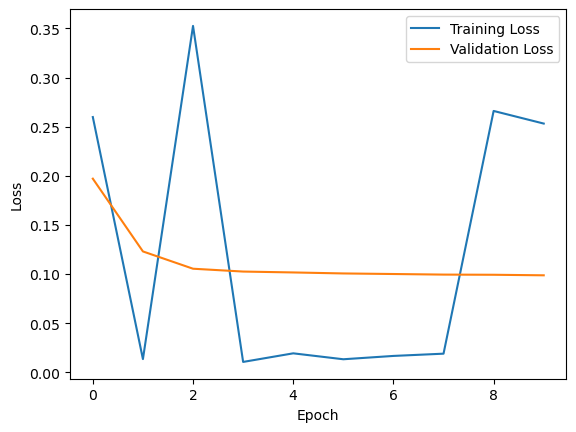

In [87]:
import matplotlib.pyplot as plt

# Define the loss function and optimizer
loss_fn = nn.MSELoss()
learning_rate = .001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Initialize lists to store the training and validation losses
train_losses = []
val_losses = []

# Train the model for the specified number of epochs
num_epochs = 10
for epoch in range(num_epochs):
    for batch in train_loader:
        # Move the batch of training data to the device
        X_batch, y_batch = batch
        X_batch = X_batch.float()
        y_batch = y_batch.float()
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        # Forward pass
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch.unsqueeze(1))
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Evaluate the model on the validation set
    with torch.no_grad():
        val_loss_sum = 0
        num_batches = 0
        for batch in val_loader:
            # Move the batch of validation data to the device
            X_batch, y_batch = batch
            X_batch = X_batch.float()
            y_batch = y_batch.float()
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            # Forward pass
            y_pred = model(X_batch)
            val_loss = loss_fn(y_pred, y_batch.unsqueeze(1))
            val_loss_sum += val_loss.item()
            num_batches += 1
            
        # Calculate the average validation loss for the epoch
        val_loss_avg = val_loss_sum / num_batches
        
        # Append the training and validation losses to their respective lists
        train_losses.append(loss.item())
        val_losses.append(val_loss_avg)
            
        # Print progress
        print(f"Epoch [{epoch}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss_avg:.4f}")

# Plot the training and validation loss curves
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [88]:
# Evaluate the trained model on the test set
model.eval()

test_loss = 0
correct = 0
with torch.no_grad():
    for batch in val_loader:
        # Move the batch of testing data to the device
        X_batch, y_batch = batch
        X_batch = X_batch.float()
        y_batch = y_batch.float()
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        y_pred = model(X_batch)

        # Compute loss
        loss = loss_fn(y_pred, y_batch)
        if isinstance(loss, tuple):
            test_loss += loss[0].item()
        else:
            test_loss += loss.item()

        # Compute number of correct predictions
        y_pred_class = torch.argmax(y_pred, dim=1)
        y_batch_class = torch.argmax(y_batch, dim=1)
        correct += (y_pred_class == y_batch_class).sum().item()

test_loss /= len(val_loader.dataset)
accuracy = correct / len(val_loader.dataset)

print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {accuracy:.2%}')



Test set: Average loss: 0.0031, Accuracy: 82.97%


In [89]:
# Export model
model.to('cpu')
onnx_file_name = "torch_model.onnx"
dummy_input = torch.randn(1,8)

# Export the trained model to ONNX format
torch.onnx.export(model,                 # model being run
                  dummy_input,           # dummy input tensor
                  onnx_file_name,        # output file name
                  verbose=True,          # print out a lot of information
                  input_names=["input"], # specify the name of the input
                  output_names=["output"], # specify the name of the output
                  opset_version=10)      # the ONNX version to use


torch.save(model.state_dict(), model_path)